# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kartika Rahma Sulistyawati
- **Email:** tyakartika24@gmail.com
- **ID Dicoding:** kartika_rahma_s

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi peminjaman sepeda berdasarkan weathersit?
- Bagaimana variasi penyewaan sepeda sepanjang hari?

## Import Semua Packages/Library yang Digunakan

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day dari file day.csv menjadi sebuah DataFrame

In [71]:
day_df = pd.read_csv("day.csv")

Menampilkan 5 baris pertama dari DataFrame day_df

In [72]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour dari file hour.csv menjai sebuah DataFrame

In [73]:
hour_df = pd.read_csv("hour.csv")

Menampilkan 5 baris pertama dari DataFrame hour_df

In [74]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dataset day.csv merupakan jumlah bike sharing yang dikumpulkan per hari.
- dataset hour.csv merupakan jumlah bike sharing yang dikumpulkan per jam.
- baik hour.csv maupun day.csv memiliki kolom berikut, kecuali hr yang tidak tersedia di day.csv:
  - instant: indeks catatan
  - dteday: tanggal
  - season: musim (1:springer, 2:summer, 3:fall, 4:winter)
  - yr: tahun (0:2011, 1: 2012)
  - mnth: bulan (1 hingga 12)
  - hr: jam (0 hingga 23)
  - holiday: weather day libur atau tidak
  - weekday: hari dalam seminggu
  - workingday: jika hari tersebut bukan akhir pekan atau hari libur adalah 1, jika tidak adalah 0
  - weathersit:
    - 1: bersih, sedikit awan, berawan sebagian
    - 2: kabut+berawan, kabut+awan pecah, kabut+sedikit berawan, kabut
    - 3: salju ringan, hujan ringan+badai petir+ awan tersebar, hujan ringan+awan tersebar
    - 4: hujan lebat+es palet+badai petir+kabut, salju+kabut
  - temp: suhu normal dalam celcius. nilai dibagi menjadi 41 (maks)
  - atemp: suhu normalized feeling dalam celcius. nilai dibagi menjai 50 (maks)
  - hum: kelembaban normal. nilai dibagi menjadi 100 (maks)
  - windspeed: kecepatan angin normal. nilai dibagi menjadi 67 (maks)
  - casual: jumla pengguna casual
  - registered: jumlah pengguna terdaftar
  - cnt: jumlah total sepeda sewaan termasuk casual dan terdaftar.

### Assessing Data

#### Menilai data day_df

In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jumlah data pada day_df telah lengkap, tidak ada missing value di dalamnya. Namun, terdapat kesalahan tipe data untuk kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df. proses ini dilakukan dengan menjalankan kode berikut.

In [76]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada hasil tersebut. day_df tidak terdapat duplikasi dan keanehan nilai.

#### Menilai data hour_df

In [77]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jumlah data pada hour_df telah lengkap, tidak ada missing value di dalamnya. Namun, terdapat kesalahan tipe data untuk kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada hour_df.

In [78]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada duplikasi dan keanehan nilai pada hour_df.

**Insight:**
- Pada day_df terdapat kesalahan tipe data untuk kolom dteday.
- Pada hour_df terdapat kesalahan tipe data untuk kolom dteday.

### Cleaning Data

#### Membersihkan data day_df

Membersihkan data day_df dengan mengganti tipe data pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Proses ini menggunakan funtion to_datetime() yang disediakan oleh library pandas.

In [79]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Untuk memastikan perubahan berjalan sesuai harapan, tipe data tersebut diperiksa kembali menggunakan method info()

In [80]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Semua tahapan untuk mengganti tipe data pada day_df sudah berjalan sesuai harapan

#### Membersihkan data hour_df

Membersihkan data hour_df dengan mengganti tipe data pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Proses ini menggunakan funtion to_datetime() yang disediakan oleh library pandas.

In [81]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Untuk memastikan perubahan berjalan sesuai harapan, tipe data tersebut diperiksa kembali menggunakan method info()

In [82]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Semua tahapan untuk mengganti tipe data pada day_df sudah berjalan sesuai harapan.

**Insight:**
- Proses cleaning data day_df sudah berjalan sesuai harapan. Tipe data pada kolom dteday yang awalnya object berubah menjadi datetime.
- Proses cleaning data hour_df sudah berjalan sesuai harapan. Tipe data pada kolom dteday yang awalnya object berubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore data day_df

Pada tahap ini, kita melihat deskripsi statistik dan variabel cnt (jumlah total peminjaman) dan weathersit.

In [83]:
print(day_df[['cnt', 'weathersit']].describe())

               cnt  weathersit
count   731.000000  731.000000
mean   4504.348837    1.395349
std    1937.211452    0.544894
min      22.000000    1.000000
25%    3152.000000    1.000000
50%    4548.000000    1.000000
75%    5956.000000    2.000000
max    8714.000000    3.000000


Berdasarkan deskripsi statistik tersebut, weathersit hanya 1 sampai 3, tidak sampai 4. Jumlah peminjaman sepeda paling sedikit 22 dan paling banyak 8714.

Selanjutnya kita mencoba melihat persebaran jumlah peminjam berdasarkan weathersit.

In [84]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

### Explore data hour_df

Pada tahap ini, kita melihat deskripsi statistik dan variabel cnt (jumlah total peminjaman) dan variabel hr (jam).

In [85]:
print(hour_df[['cnt', 'hr', 'casual', 'registered']].describe())

                cnt            hr        casual    registered
count  17379.000000  17379.000000  17379.000000  17379.000000
mean     189.463088     11.546752     35.676218    153.786869
std      181.387599      6.914405     49.305030    151.357286
min        1.000000      0.000000      0.000000      0.000000
25%       40.000000      6.000000      4.000000     34.000000
50%      142.000000     12.000000     17.000000    115.000000
75%      281.000000     18.000000     48.000000    220.000000
max      977.000000     23.000000    367.000000    886.000000


Berdasarkan deskripsi statistik tersebut, peminjaman sepeda terjadi dari 0-23 jam. Jumlah sepeda yang disewa paling sedikit 1 dan paling banyak 977. jumlah pengguna casual paling sedikit 0 dan paling banyak 367, Jumlah pengguna registered paling sedikit 0 dan paling banyak 886.

Selanjutnya kita mencoba melihat persebaran jumlah peminjam berdasarkan hr.

In [86]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

hr
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64

### **Insight EDA:**
- Jumlah penyewa sepeda pada weathersit 1 terbanyak dan paling sedikit ada di weather sit 3.
- Jumlah penyewa sepeda paling banyak ada di jam 17 dan paling sedikit di jam 4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi peminjaman sepeda berdasarkan weathersit?

Viualisasi menggunakan line chart dan boxplot untuk melihat distribusi peminjaman sepeda (cnt) berdasarkan weathersit.

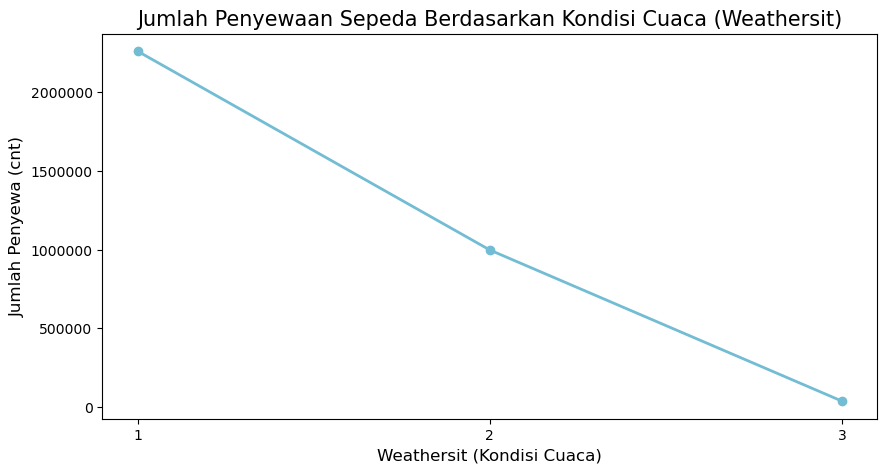

In [87]:
weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(weather_rentals['weathersit'], weather_rentals['cnt'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Weathersit)", loc="center", fontsize=15)
plt.xlabel("Weathersit (Kondisi Cuaca)", fontsize=12)
plt.ylabel("Jumlah Penyewa (cnt)", fontsize=12)
plt.xticks(ticks=[1, 2, 3])
plt.ticklabel_format(style='plain', axis='y')
plt.show()


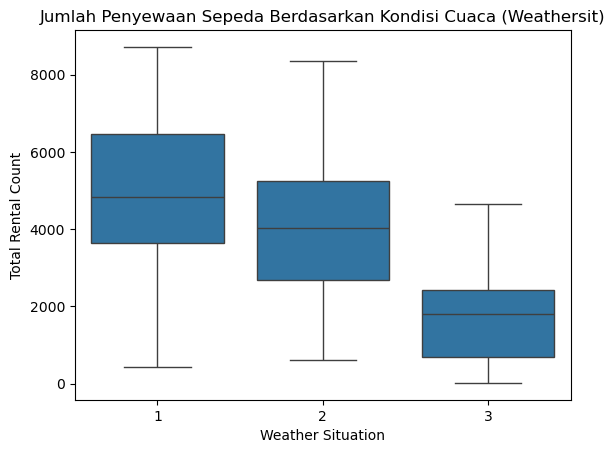

In [88]:
fig, ax = plt.subplots()
sns.boxplot(x='weathersit', y='cnt', data=day_df, ax=ax)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Weathersit)")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rental Count")
plt.show()

**Insight:**
- Weather situation 1: menunjukkan bahwa jumlah penyewa tertinggi terjadi di cuaca 1 yaitu bersih, sedikit awan, berangin sebagian.
- Weather situation 2: jumlah penyewa sepeda lebih rendah daripada weather situation 1. Kondisi cuaca 2 yaitu kabut+berawan, kabut+awan pecah, kabut+sedikit berawan, kabut.
- Weather situation 3: pada cuaca 3 yaitu salju ringan, hujan ringan+badai petir+ awan tersebar, hujan ringan+awan tersebar, memiliki jumlah penyewa yang paling sedikit dibanding weather situation 1 dan 2.

### Pertanyaan 2:
Bagaimana variasi penyewaan sepeda sepanjang hari?

Visualisasi menggunakan line chart untuk melihat jumlah sepeda yang disewa(cnt) berdasarkan hr.

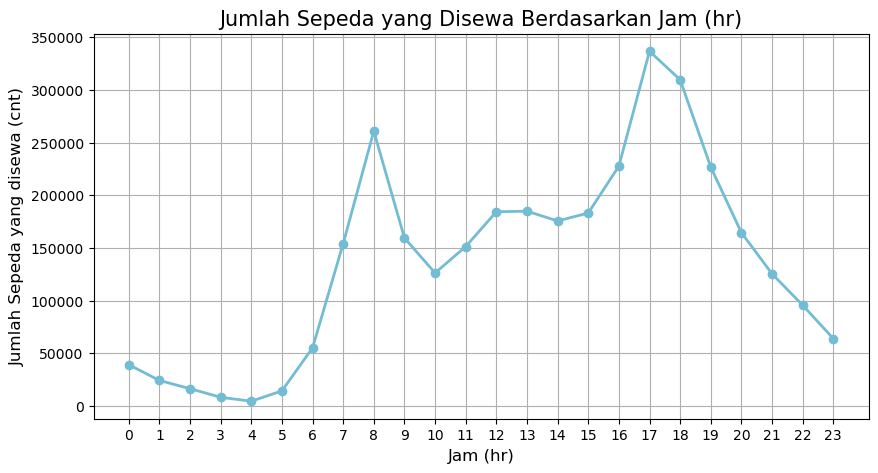

In [89]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly_rentals['hr'], hourly_rentals['cnt'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Sepeda yang Disewa Berdasarkan Jam (hr)", loc="center", fontsize=15)
plt.xlabel("Jam (hr)", fontsize=12)
plt.ylabel("Jumlah Sepeda yang disewa (cnt)", fontsize=12)
plt.xticks(ticks=range(0, 24))  # Setting the x-ticks from 0 to 23 to represent hours
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)  # Adding grid lines for better readability
plt.show()


Visualisasi menggunakan dogged bar untuk melihat pengguna casual dan registered berdasarkan jam (hr).

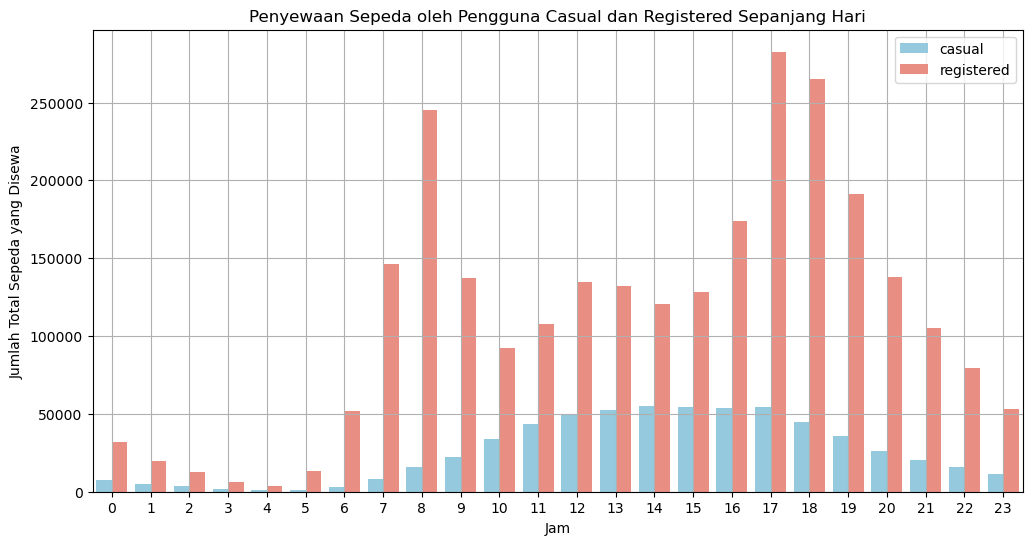

In [94]:
hourly_casual_registered_melted = hourly_casual_registered.melt(id_vars='hr', value_vars=['casual', 'registered'], var_name='User Type', value_name='Rental Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='Rental Count', hue='User Type', data=hourly_casual_registered_melted, palette=["skyblue", "salmon"])
plt.title("Penyewaan Sepeda oleh Pengguna Casual dan Registered Sepanjang Hari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Total Sepeda yang Disewa")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

**Insight:**
- Terdapat lonjakan jumlah sepeda yang disewakan diantara pukul 6 sampai 8 dan antara 16 sampai 17. Dimana lonjakan terebut dapat berkaitan dengan banyaknya aktivitas jumlah penggunaan sepeda dalam hal ini jumlah sepeda yang disewakan pada jam tersebut.
- Jumlah sepeda yang disewakan sangat rendah pada jam 0-5.
- Diantara jam 10-15 jumlah sepeda yang disewakan stabil.
- Penyewa sepeda lebih banyak pengguna registered daripada casual.

## Analisis Lanjutan

#### Pada Pertanyaan 1
Kita akan melakukan clustering manual pada variable cnt. Data dibagi menjadi tiga kelompok (kuartil) berdasarkan jumlah peminjaman sepeda (rendah, sedang, tinggi). Pengelompokan ini akan memudahkan dalam melihat pola antara kondisi cuaca dan tingkat peminjaman.

In [91]:
day_df['cnt_quartile'] = pd.qcut(day_df['cnt'], 3, labels=['Rendah', 'Sedang', 'Tinggi'])

Viualisasi menggunakan scatterplot untuk melihat distribusi peminjaman sepeda (cnt) berdasarkan weathersit dan hasil clustering kuartil yang telah dilakukan.

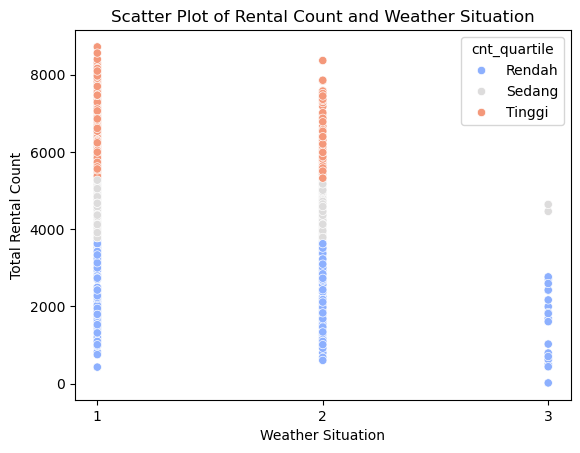

In [92]:
sns.scatterplot(x='weathersit', y='cnt', hue='cnt_quartile', data=day_df, palette='coolwarm')
plt.title('Scatter Plot of Rental Count and Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rental Count')
plt.xticks([1, 2, 3], ['1', '2', '3'])
plt.show()

Berdasarkan scatterplot di atas:
- Weather situation 1: menunjukkan bahwa sebagian besar penyewaan terjadi di cuaca 1 yaitu bersih, sedikit awan, berangin sebagian. Ini terlihat dari banyaknya titik yang terdistribusi pada kategori weathersit = 1, dan mereka mencakup rentang rendah, sedang, tinggi untuk jumlah penyewaan.
- Weather situation 2: penyewaan sepeda juga cukup sering terjadi dalam kondisi cuaca 2 yaitu kabut+berawan, kabut+awan pecah, kabut+sedikit berawan, kabut dengan distribusi penyewaan rendah, sedang, tinggi.
- Weather situation 3: pada cuaca 3 yaitu salju ringan, hujan ringan+badai petir+ awan tersebar, hujan ringan+awan tersebar, penyewaan cenderung berkurang drastis, dengan distribusi penyewaan rendah dan sedang.

#### Pada Pertanyaan 2
Kita akan melakukan clustering manual. Data dibagi menjadi tiga kelompok (kuartil) berdasarkan jumlah peminjaman sepeda (rendah, sedang, tinggi). Data hr juga akan dikelompokkan menjadi 5 (dini hari, pagi, siang, sore malam). Visualisasi clustering menggunakan scatterplot.

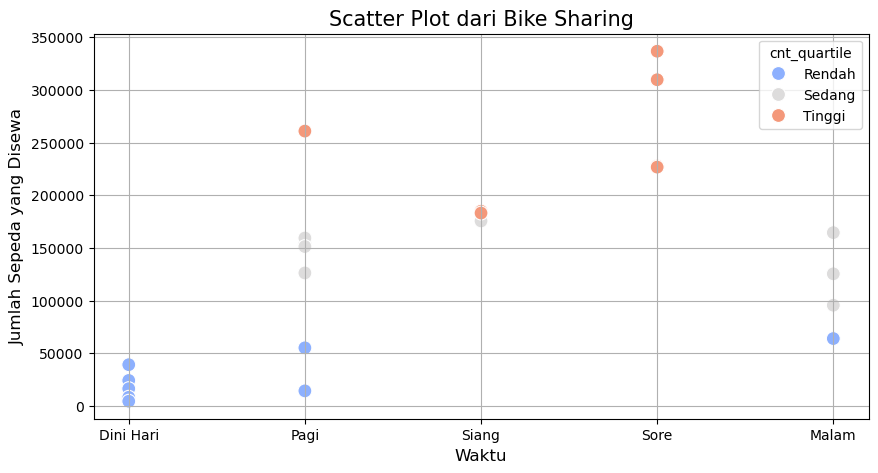

In [93]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

def categorize_hour(hr):
    if 0 <= hr <= 4:
        return 'Dini Hari'
    elif 5 <= hr <= 11:
        return 'Pagi'
    elif 12 <= hr <= 15:
        return 'Siang'
    elif 16 <= hr <= 19:
        return 'Sore'
    else:
        return 'Malam'

hourly_rentals['time_of_day'] = hourly_rentals['hr'].apply(categorize_hour)
hourly_rentals['cnt_quartile'] = pd.qcut(hourly_rentals['cnt'], 3, labels=['Rendah', 'Sedang', 'Tinggi'])

plt.figure(figsize=(10, 5))
sns.scatterplot(x='time_of_day', y='cnt', hue='cnt_quartile', data=hourly_rentals, palette='coolwarm', s=100)

plt.title('Scatter Plot dari Bike Sharing', fontsize=15)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=12)
plt.grid(True)
plt.show()


Berdasrkan scatterplot di atas:
- Pagi (5-11) dan sore (16-19) adalah puncak penyewaan sepeda.
- Dini hari (0-4) dan malam (20-23) menunjukkan jumlah sepeda yang disewakan rendah, jumlah sepeda yang disewakan dini hari berada di kategori rendah, sedangkan malam rendah dan sedang.
- Waktu siang (12-15) memiliki kategori penyewaan yang cukup tinggi mendekati pagi dan sore hari.

## Conclusion

- Cuaca (weather situation) memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Pengguna lebih banyak menyewa saat cuaca bersih, sedikit awan, berangin sebagian. Sedangkan penyewaan menurun drastis dalam kondisi cuaca salju ringan, hujan ringan+badai petir+ awan tersebar, hujan ringan+awan tersebar.
- Waktu pagi (5-11) dan sore (16-19) paling tinggi dalam jumlah sepeda yang disewakan sehingga sangat penting untuk kapasitas maksimal sistem bike sharing, dengan waktu siang (12-15) juga memperlihatkan penggunaan bike sharing yang tinggi. Redistribusi sepeda dan perawatan sistem pada dini hari (0-4) atau malam (20-23) dapat membantu memaksimalkan ketersediaan dan performa sistem karena pada jam tersebut termasuk rendah dan sedang dalam jumlah sepeda yang disewakan.